In [58]:
#!pip install streamlit

In [2]:
import pandas as pd
import numpy as np
import yaml
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [ ]:
from sys import path
from os.path import abspath

path.insert(0, abspath('../src'))


In [ ]:
# Final-Project
# |__ notebooks/
# |   |__ lung_cancer.ipynb
# |__ params.yaml

In [3]:
with open("../params.yaml") as file:
    config = yaml.safe_load(file)

In [ ]:

# with open(config["models"]["linear_reg"]) as file:
#    linReg = pickle.load(file)

In [8]:
data = pd.read_csv(config['data']['raw'])
data = pd.read_csv('survey_lung_cancer.csv')

In [9]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [11]:
cols = []
for colname in data.columns:
    cols.append(colname.lower().replace(' ','_'))

data.columns = cols

display(data.head())

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue_,allergy_,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [12]:
data.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue_', 'allergy_', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')

In [17]:
#Shape of the dataset
data.shape

(309, 16)

In [13]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        309 non-null    int64 
 7   fatigue_               309 non-null    int64 
 8   allergy_               309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol_consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness_of_breath    309 non-null    int64 
 13  swallowing_difficulty  309 non-null    int64 
 14  chest_pain             309 non-null    int64 
 15  lung_cancer            

In [20]:
# Description of Numerical variables
data.describe()

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [14]:
# Checking for null values
data.isna().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic_disease          0
fatigue_                 0
allergy_                 0
wheezing                 0
alcohol_consuming        0
coughing                 0
shortness_of_breath      0
swallowing_difficulty    0
chest_pain               0
lung_cancer              0
dtype: int64

There are no null values or missing values in dataset. 

In [15]:
# Checking  for duplicate values 
data.duplicated().sum()

33

In [32]:
# Drop These duplicate rows  
data.drop_duplicates(inplace = True)

In [16]:
data.shape

(309, 16)

In [ ]:
data.to_csv(config['data']['clean'], index=False)

<AxesSubplot:>

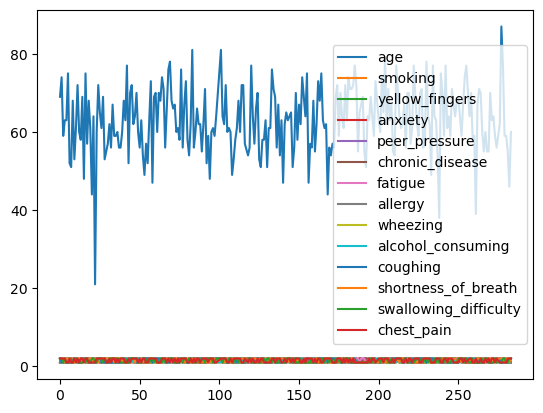

In [36]:
data.plot()

In [ ]:
# As the values for most of the columns are  1 and 2 we can not get any precise idea from this plot

In [24]:
#def plt_bar(df):
    for i in df.columns:
        if i == "AGE":
        #continue
            print(df[i].value_counts())
            fig, y = plt.subplots((plt_size), 5, figsize=(5, 4))
        plt.show()
        print('\n')

In [108]:
def plot_barplot(df):
    
    col_names = list(df)
    plt_size = len(col_names) #define rows in subplot
    n = 0 #counter to attribute position for plot
    print("\n\n")
    fig, ax = plt.subplots(plt_size, 1, figsize=(5,65))
    n = 0
    for i in col_names:
        
        sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), ax = ax[n])
        ax[n].set(xlabel = i, ylabel='Count')
        n += 1
   
    plt.show()
    print("\n\n")
    

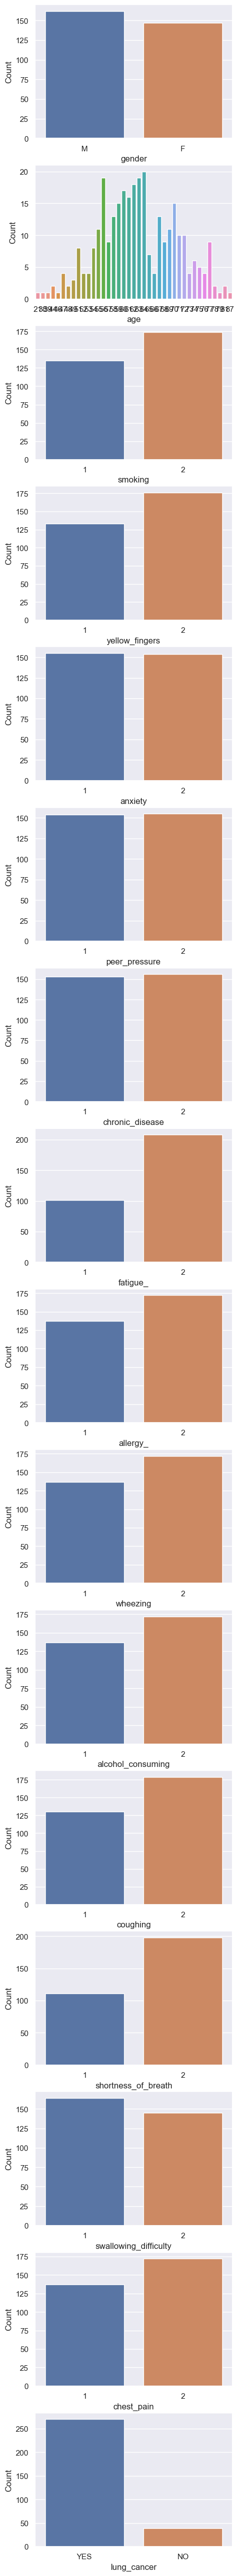

In [109]:
plot_barplot(data)

In [59]:
data.describe()

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue_,allergy_,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<AxesSubplot:>

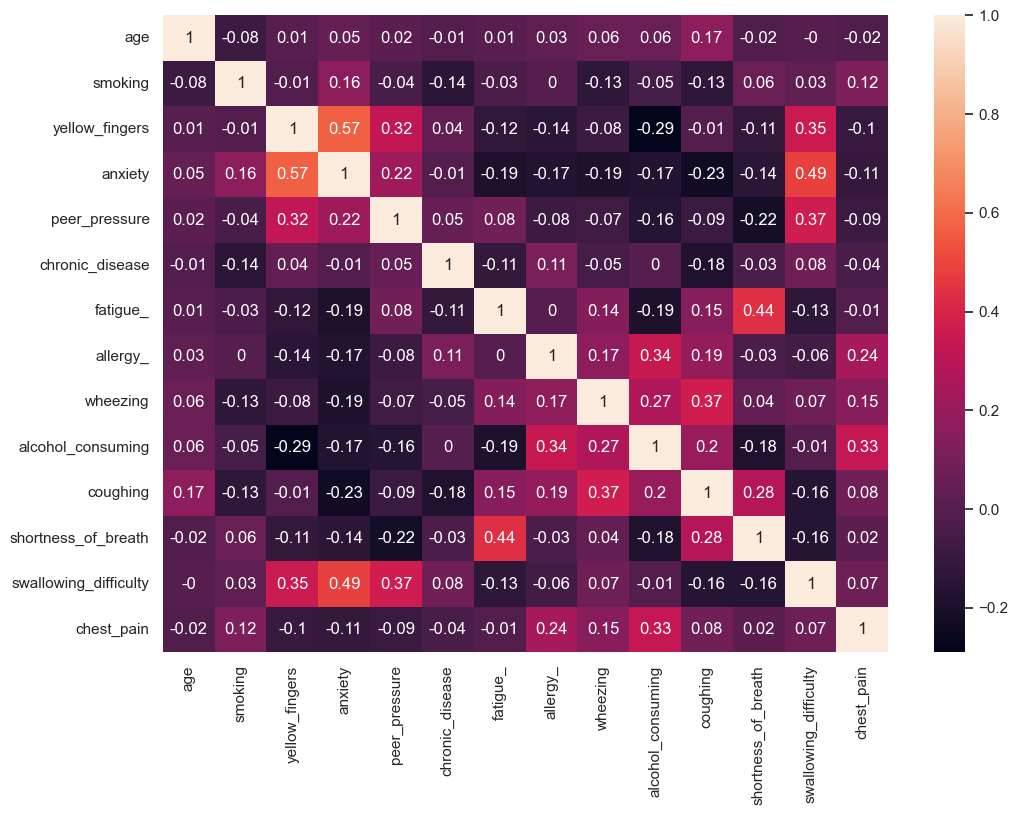

In [60]:
correlation_matrix = data.corr().round(2)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

Correlation Matrix does not give much info. 

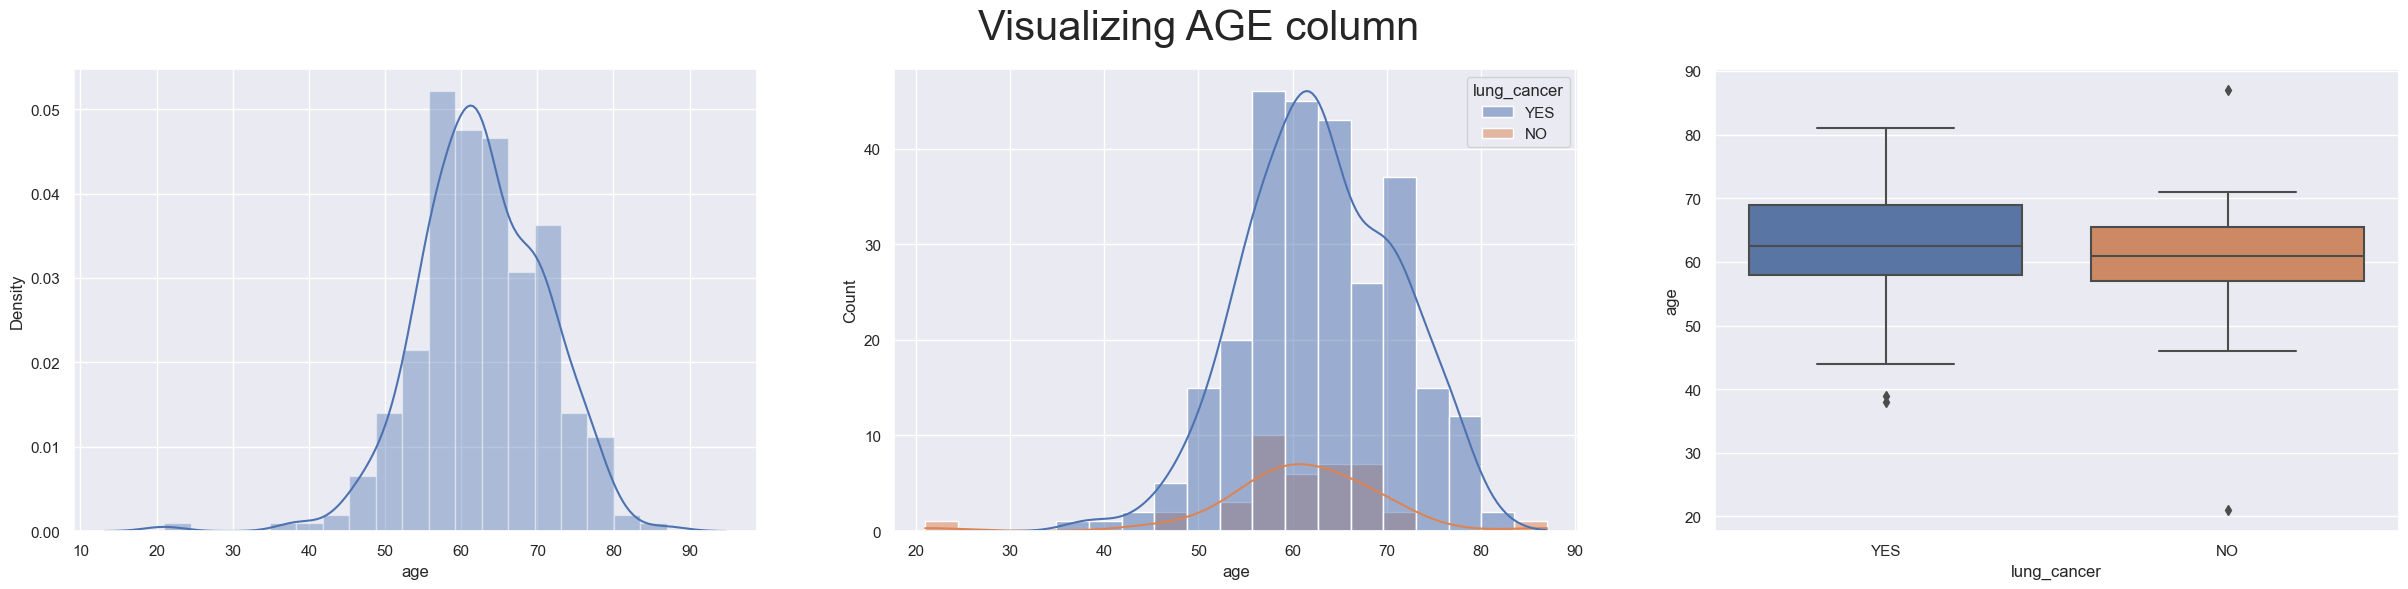

In [74]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(30,6))
sns.distplot(data['age'],ax=ax[0])
sns.histplot(data =data,x='age',ax=ax[1],hue='lung_cancer',kde=True)
sns.boxplot(x=data['lung_cancer'],y=data['age'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=30)
plt.show()

We can see some outliers from the box plot. From the plot above, most common age for detecting Lunge cancer is between 50 to 70. But there are some rare cases from other age groups too  